In [20]:
#make modules reload automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from snake_env import SnakeEnv
from apple import Apple
from snake import Snake

In [27]:
import pygame
import random
import numpy as np
import ray
from ray.tune.registry import register_env
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG
from ray.tune.logger import pretty_print

In [28]:
ray.init(ignore_reinit_error=True)
print("Ray initialized")

2023-05-01 11:54:28,433	INFO worker.py:1382 -- Calling ray.init() again after it has already been called.


Ray initialized


In [29]:
def env_creator(env_config):
    return SnakeEnv(env_config)

In [41]:
snakie = SnakeEnv({"render_mode" : "human"})
snakie.reset()

(array([9., 6., 1., 0.]), {})

In [42]:
#run forever and take actions from keyboard and collect data about the reward
done = False
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                action = 2
            elif event.key == pygame.K_RIGHT:
                action = 3
            elif event.key == pygame.K_UP:
                action = 0
            elif event.key == pygame.K_DOWN:
                action = 1
    obs,reward,done,_,_ = snakie.step(action)
    print(action)
    snakie.render("human")
    pygame.time.wait(100)

pygame.quit()

0
0
0
0
0
0
0
0
0
0
0
2
2
2
1
1
1
1
2
2
2
2
2
1
1
1
2
0
0
0
3
3
3
3
3
1
1
1
3
3
3
3
1
1
1
1
1
1
1
1
1
1


error: display Surface quit

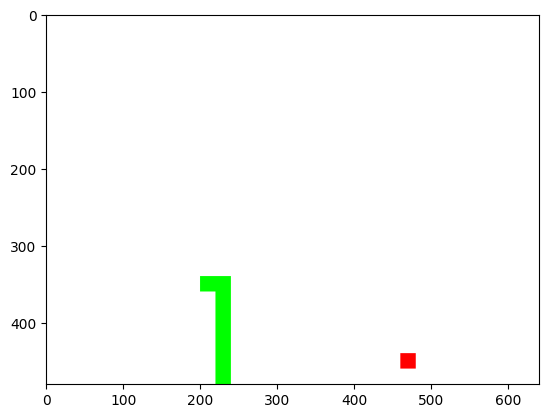

In [16]:
import mediapy as media
#make some random colored image 
img = np.random.randint(0,255,(100,100,3),dtype=np.uint8)
img = snakie.render()
#show the image
import matplotlib.pyplot as plt
plt.imshow(img)

up



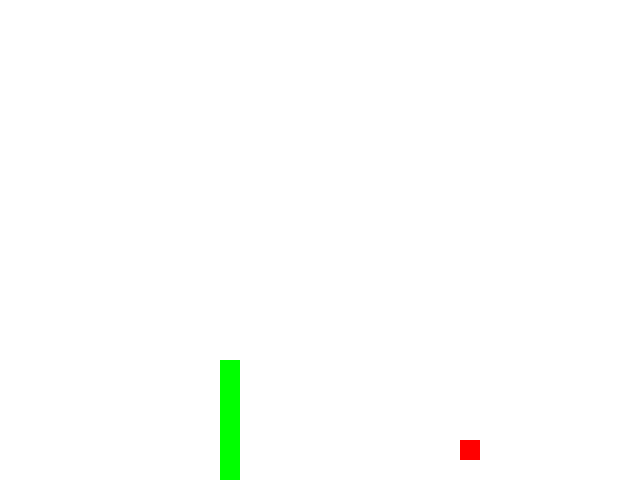

In [18]:

snakie.step("up")
media.show_image(snakie.render())

In [25]:
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [26]:
img[img ==255] = 0

In [27]:
register_env("snake-v0", env_creator)

ead the yaml as dictionary 

In [28]:
import yaml
with open("SnakeConfig.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
        if config is None:
            raise Exception("Invalid YAML file")
    except yaml.YAMLError as exc:
        print(exc)

In [29]:
print("Config loaded")

Config loaded


In [30]:
trainer = PPOTrainer(config=config, env="snake-v0")

2023-04-16 00:08:30,861	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='snake-v0', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('snake-v0').build()` instead. This will raise an error in the future!


KeyboardInterrupt: 

(autoscaler +1m10s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +1m10s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


env = SnakeEnv({"screen_width":400,"screen_height":400, "block_size":20})<br>
env.reset()<br>
dir = 'right'<br>
while env.done == False :

    #if keyboard is pressed:<br>
    env.step(dir)<br>
    env.render()<br>
    for event in pygame.event.get():<br>
        #check for keypress<br>
        if event.type == pygame.KEYDOWN:<br>
            if event.key == pygame.K_UP:<br>
                dir = 'up'<br>
            elif event.key == pygame.K_DOWN:<br>
                dir = 'down'<br>
            elif event.key == pygame.K_LEFT:<br>
                dir = 'left'<br>
            elif event.key == pygame.K_RIGHT:<br>
                dir = 'right'<br>
        if event.type == pygame.QUIT:<br>
            pygame.quit()<br>
            quit()